# Prediction using Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz

from sklearn.externals.six import StringIO
from IPython.display import Image

import pydotplus

from sklearn.metrics import classification_report

## 1. Load Data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Encode Target data

In [6]:
en = LabelEncoder()

df['target'] = en.fit_transform(df['Species'])

df.drop('Species', axis=1, inplace=True)

## 2. Base Models

### 2.1 Split Data

In [7]:
# Independent Features
X = df.drop(['Id', 'target'], axis=1)

# Dependent Feature
y = df['target'].copy()

In [8]:
# Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### 2.3 Decision Tree Classifier

In [9]:
# Assign variable for algorithm
dt1 = DecisionTreeClassifier()

# Fitting the training data
dt1.fit(X_train, y_train)

# Making Predictions
y_dt1 = dt1.predict(X_test)

# Evaluate model using metric
print("*"*44, "Decision Tree Classifier", "*"*44)
print(classification_report(y_test, y_dt1))

******************************************** Decision Tree Classifier ********************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.79      1.00      0.88        15
           2       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



### 2.4 Extra Tree Classifier

In [10]:
# Assign variable for algorithm
et1 = ExtraTreeClassifier()

# Fitting the training data
et1.fit(X_train, y_train)

# Making Predictions
y_et1 = et1.predict(X_test)

# Evaluate model using metric
print("*"*44, "Extra Tree Classifier", "*"*44)
print(classification_report(y_test, y_et1))

******************************************** Extra Tree Classifier ********************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.79      1.00      0.88        15
           2       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



## 3. Decision Tree Classifier

In [11]:
# Assign variable with algorithm
dtc = DecisionTreeClassifier()

# Fitting the data
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

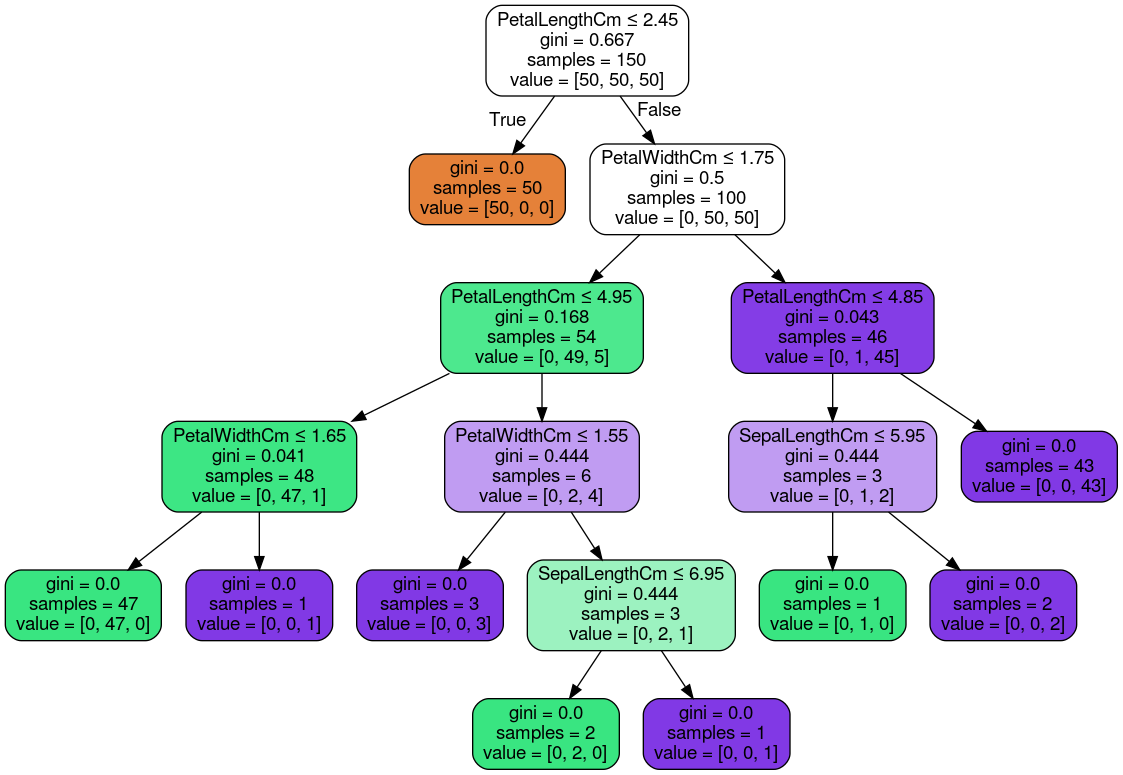

In [12]:
#Visualize the tree chart
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=X.columns.tolist(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [13]:
from dtreeviz.trees import dtreeviz

# Visualize statistical tree chart
viz = dtreeviz(dtc, X, y,
              target_name="target",
              feature_names=X.columns.tolist(),
              class_names=list(y))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


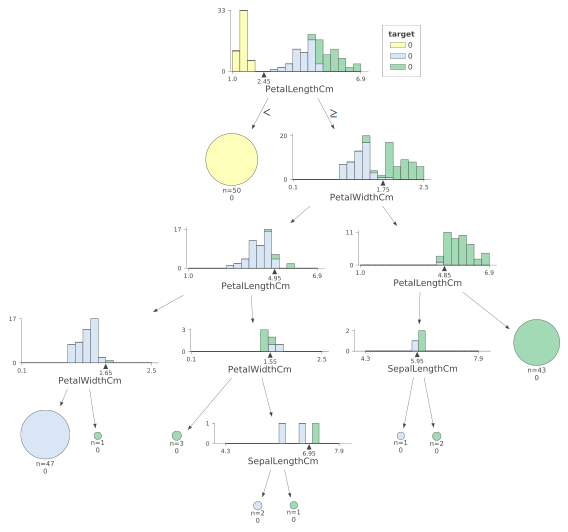

In [14]:
viz

## 3. Extra Tree Classifier

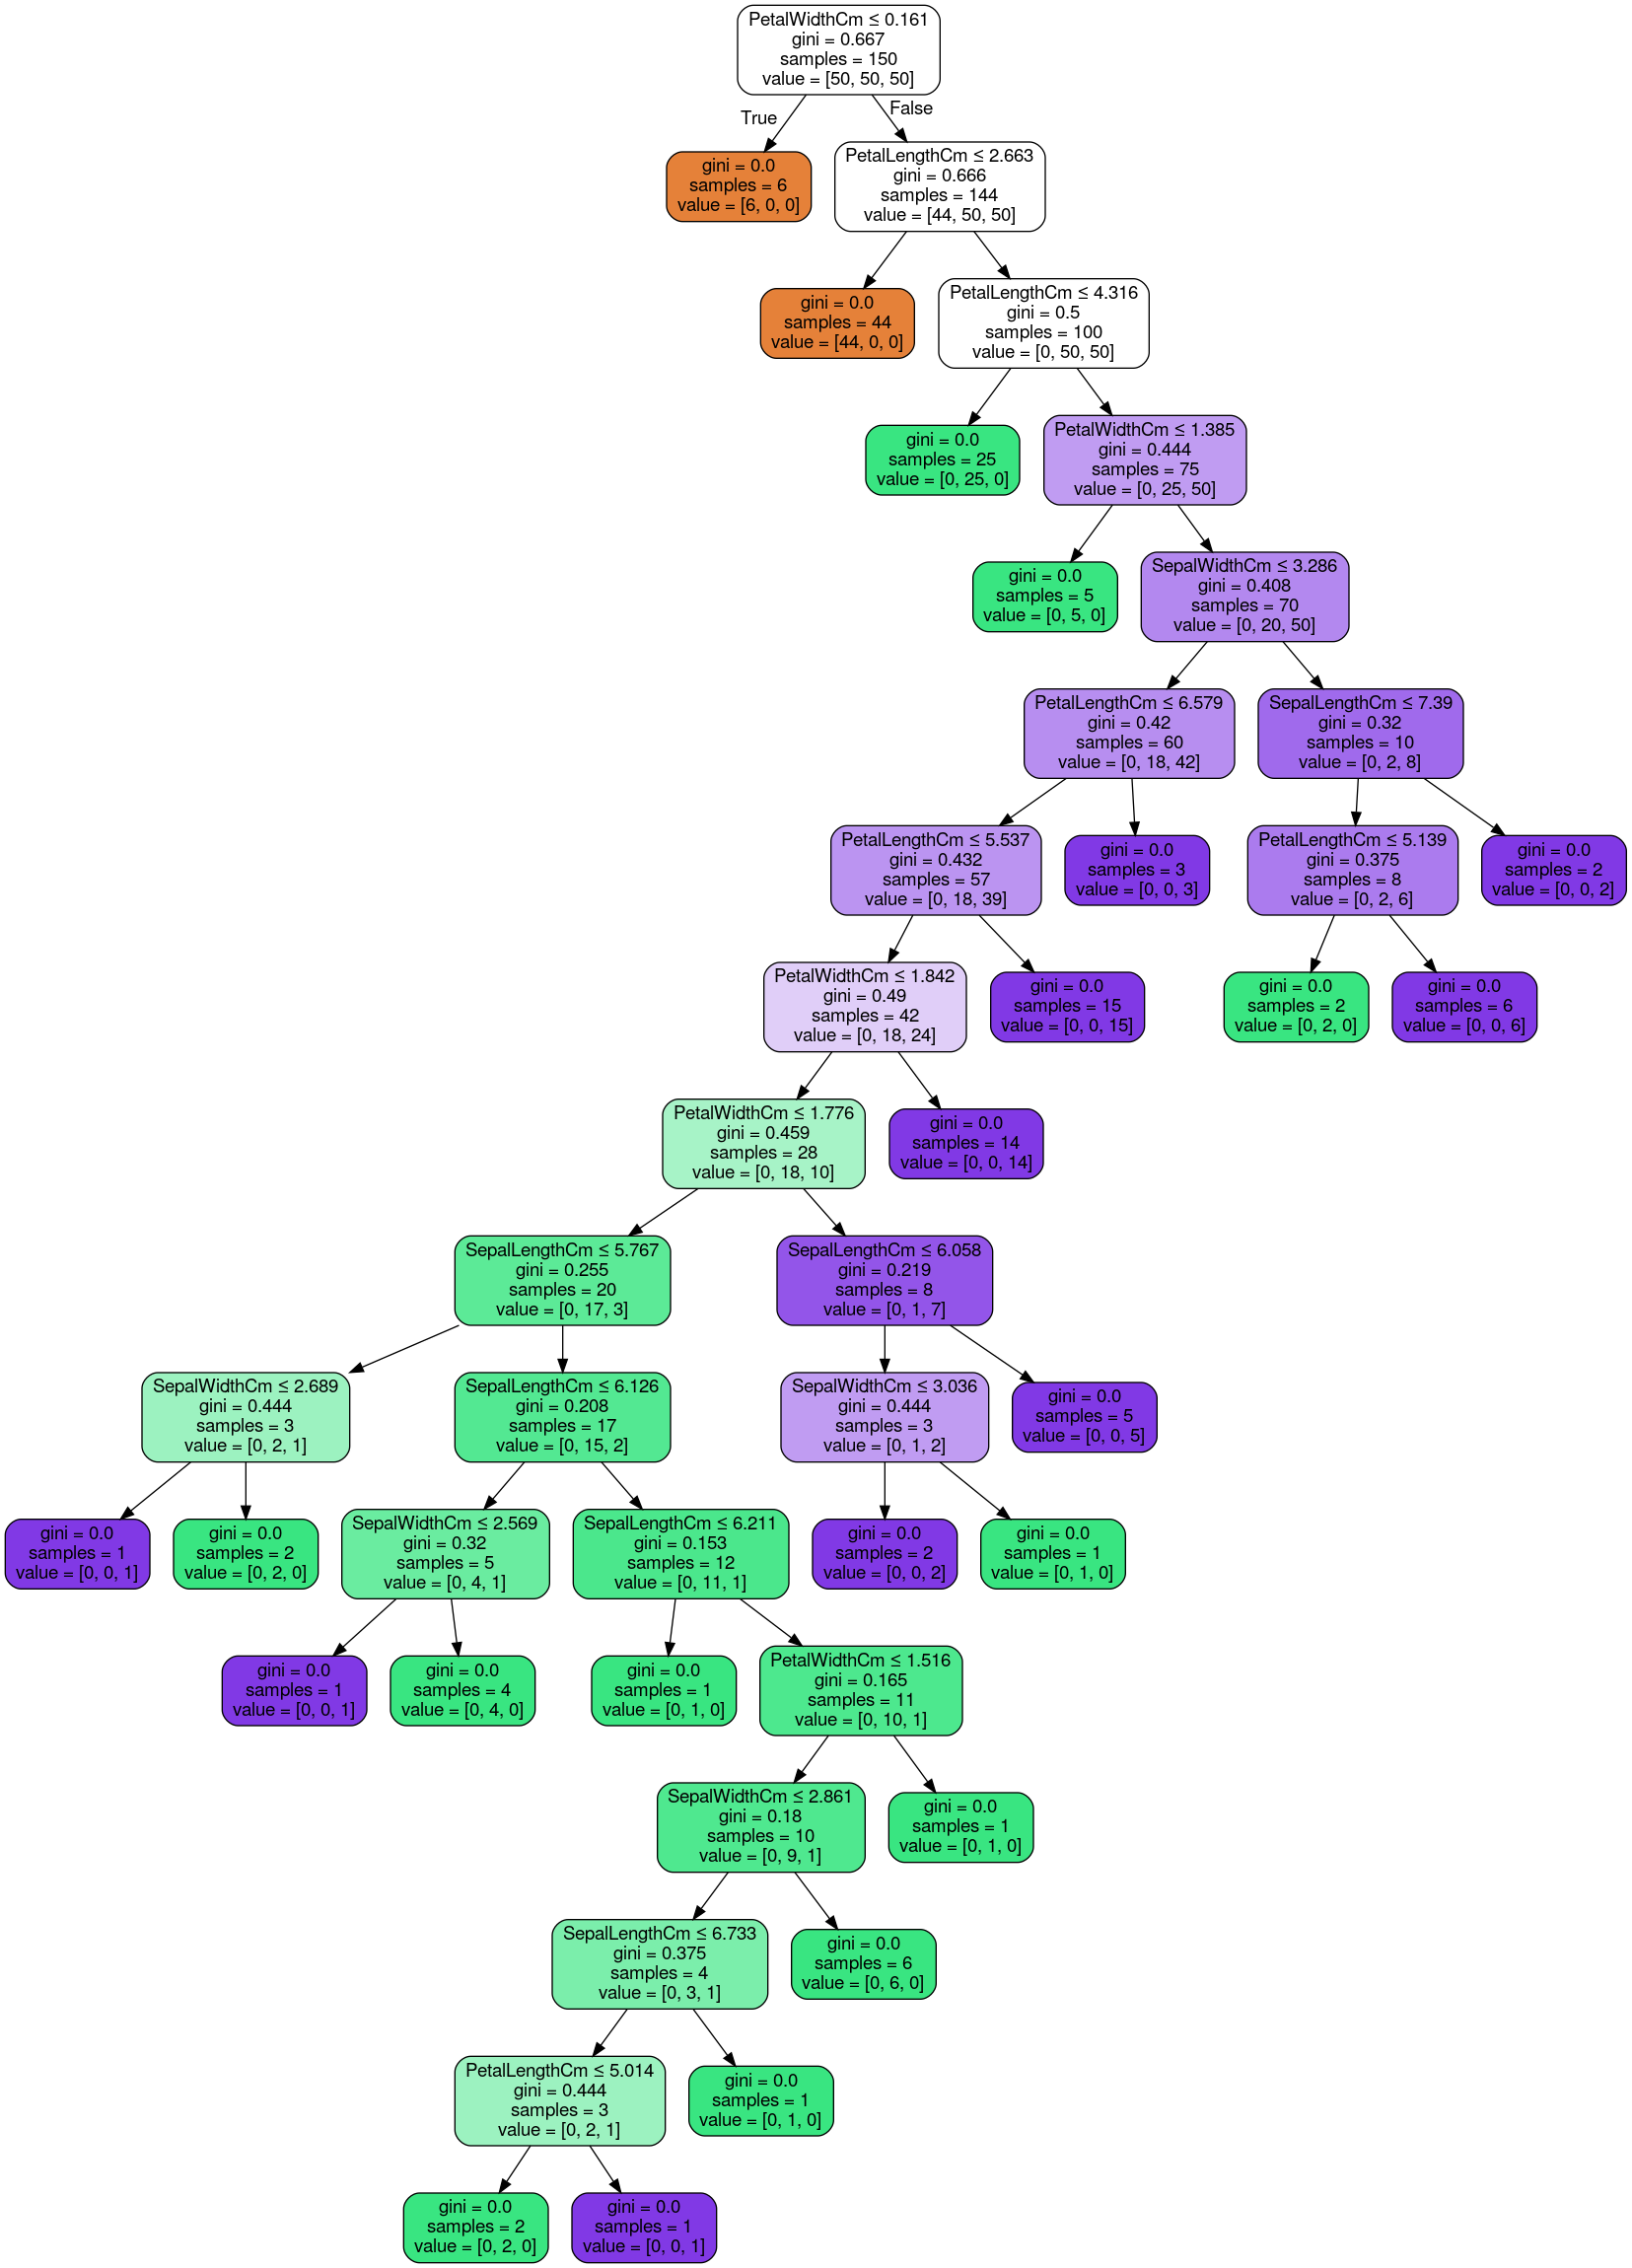

In [15]:
# Assign the algorithm on a variable
etc = ExtraTreeClassifier()

# Fitting on the data
etc.fit(X, y)

# Visualize the tree chart
dot_data2 = StringIO()

export_graphviz(etc, out_file=dot_data2, feature_names=X.columns.tolist(),
               filled=True, rounded=True,
               special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())
Image(graph2.create_png())

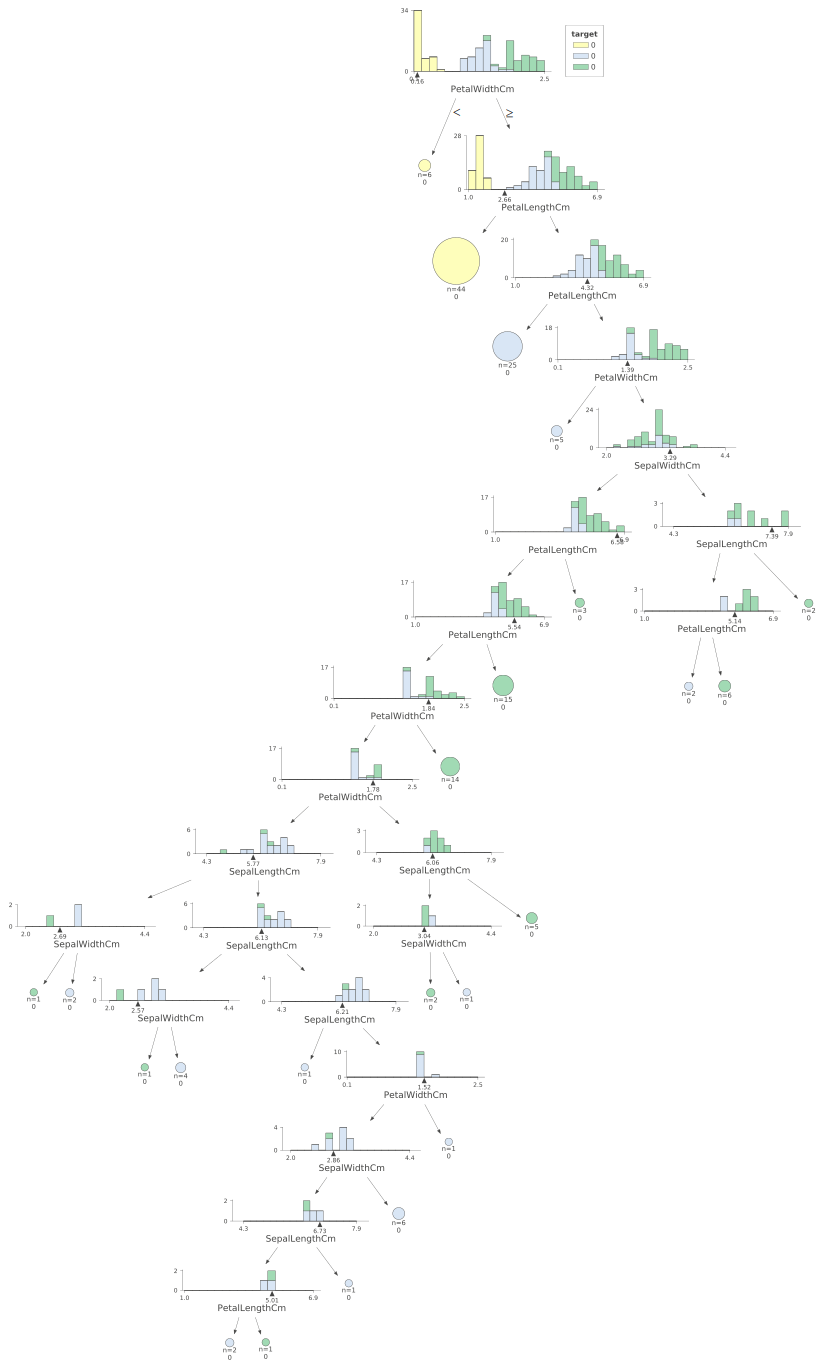

In [16]:
# Visualize statistical tree chart
viz2 = dtreeviz(etc, X, y,
              target_name="target",
              feature_names=X.columns.tolist(),
              class_names=list(y))

viz2